### Prophet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sales_data=pd.read_csv('train.csv')

C:\Users\pooji\AppData\Local\Temp\ipykernel_24764\255843651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data=pd.read_csv('train.csv')


In [8]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
sales_data.drop(columns=['Store','DayOfWeek','Customers','Open', 'Promo','StateHoliday','SchoolHoliday'], inplace=True)

In [11]:
sales_data

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [12]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [7]:
from prophet import Prophet

In [20]:
model=Prophet()

In [35]:
sales_data.rename({'df': 'ds', 'Sales': 'y'}, axis=1, inplace=True)
sales_data

,ds,y
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [36]:
model.fit(sales_data)

22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:54:58 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


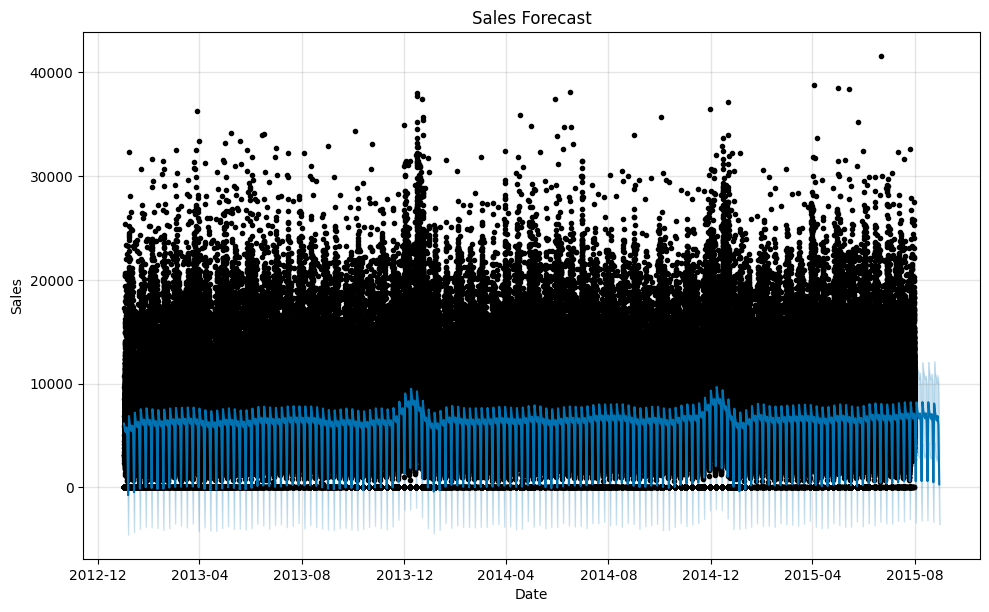

In [37]:

future_periods = 30  

future_dates = model.make_future_dataframe(periods=future_periods)

forecast = model.predict(future_dates)

fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()